# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df=pd.read_csv(r"/Users/adithkumar/Desktop/P419/solarpowergeneration.csv")
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [3]:
df.shape

(2920, 10)

In [4]:
df.size

29200

In [5]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [7]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [8]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [9]:
df.index[df.isnull().any(axis=1)]


Int64Index([714], dtype='int64')

In [10]:
df1=df

In [11]:
average_wind_speed_mean=df['average-wind-speed-(period)'].mean()
print(average_wind_speed_mean)

10.129153819801301


In [12]:
df1['average-wind-speed-(period)'].fillna(average_wind_speed_mean,inplace=True)


In [13]:
df1.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [14]:
df_corr=df1.corr()

In [15]:
df_corr

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214887,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054545,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229706,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673364,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044301,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143224,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.217959,0.018489,-0.522545
average-wind-speed-(period),-0.214887,0.054545,0.229706,0.673364,0.044301,0.143224,-0.217959,1.000000,-0.293406,0.278154
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293406,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278154,-0.036771,1.000000


# Outlier Detection

In [16]:
Q1=df1.quantile(0.25)
Q2=df1.quantile(0.50)
Q3=df1.quantile(0.75)

IQR=Q3-Q1
print('old shape',IQR)
upper=Q3+1.5*IQR
lower=Q3-1.5*IQR
print('upper',upper)
print('lower',lower)

old shape distance-to-solar-noon             0.495814
temperature                       10.000000
wind-direction                     4.000000
wind-speed                         6.500000
sky-cover                          2.000000
visibility                         0.000000
humidity                          19.000000
average-wind-speed-(period)       10.000000
average-pressure-(period)          0.190000
power-generated                12723.500000
dtype: float64
upper distance-to-solar-noon             1.483248
temperature                       78.000000
wind-direction                    35.000000
wind-speed                        22.850000
sky-cover                          6.000000
visibility                        10.000000
humidity                         112.500000
average-wind-speed-(period)       30.000000
average-pressure-(period)         30.395000
power-generated                31808.750000
dtype: float64
lower distance-to-solar-noon           -0.004193
temperature              

# Data Visualisation

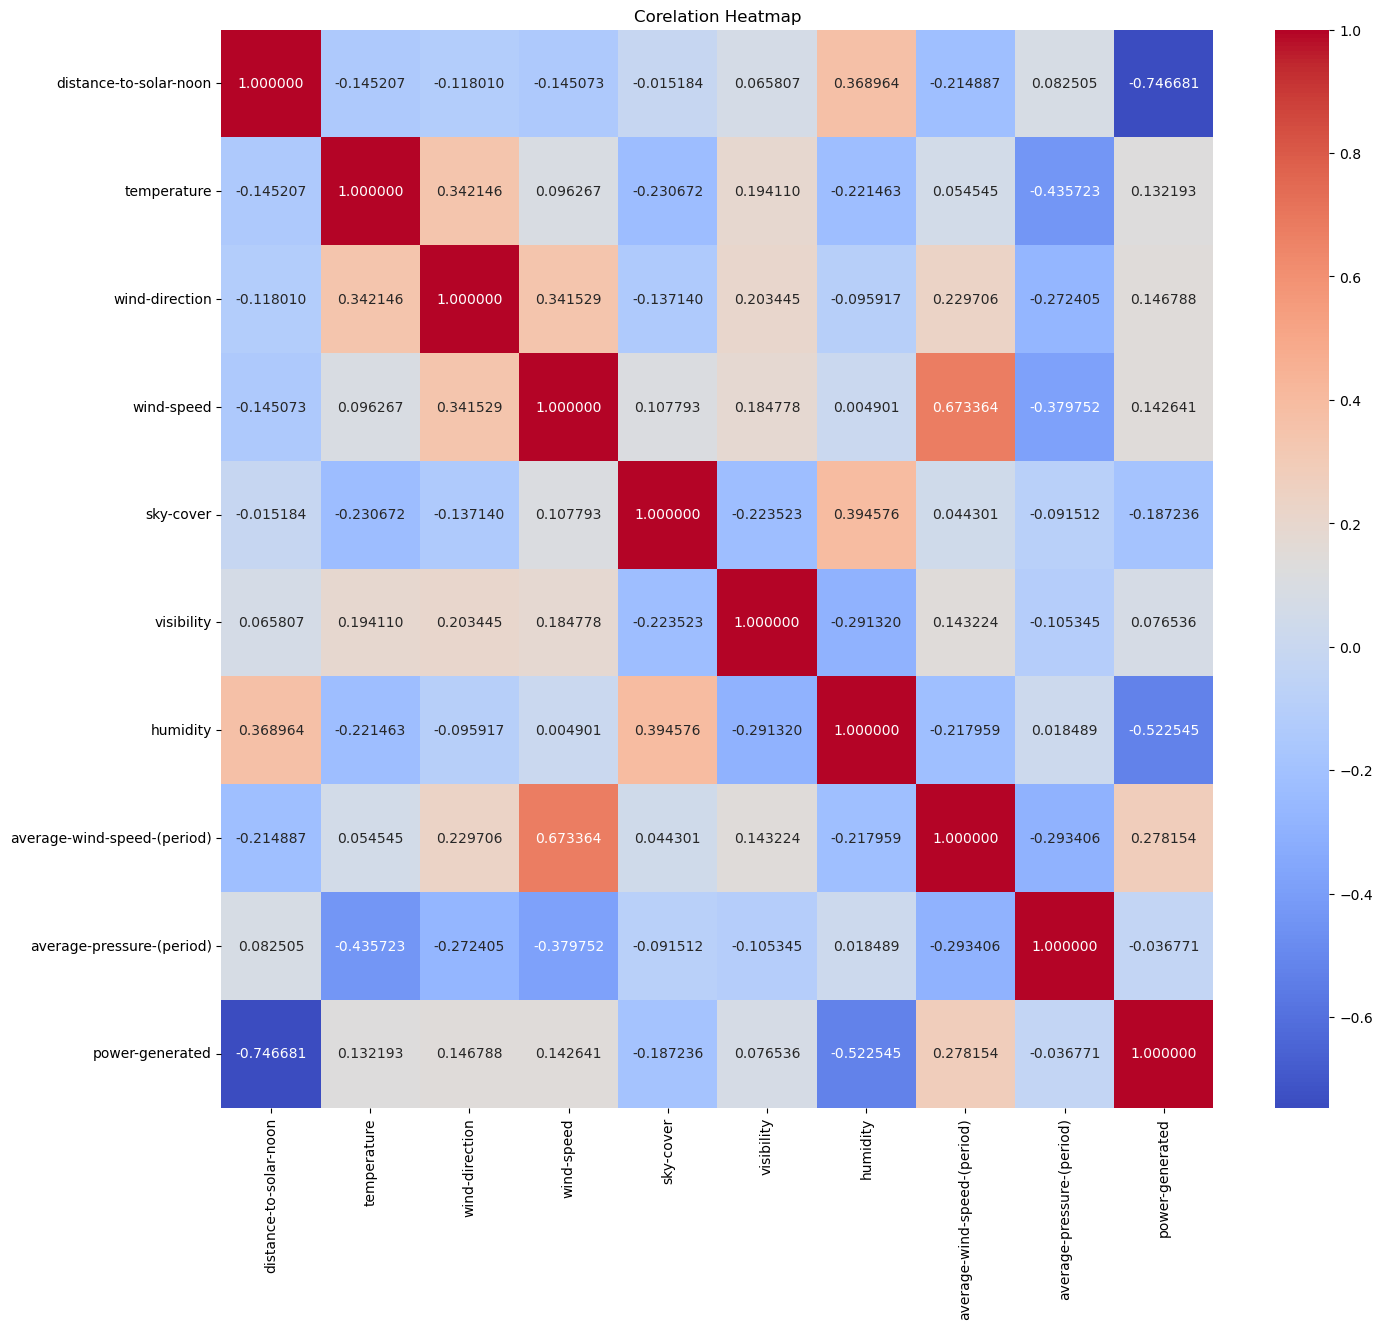

In [17]:
plt.figure(figsize=(16,14))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='2f')
plt.title("Corelation Heatmap")
plt.show()

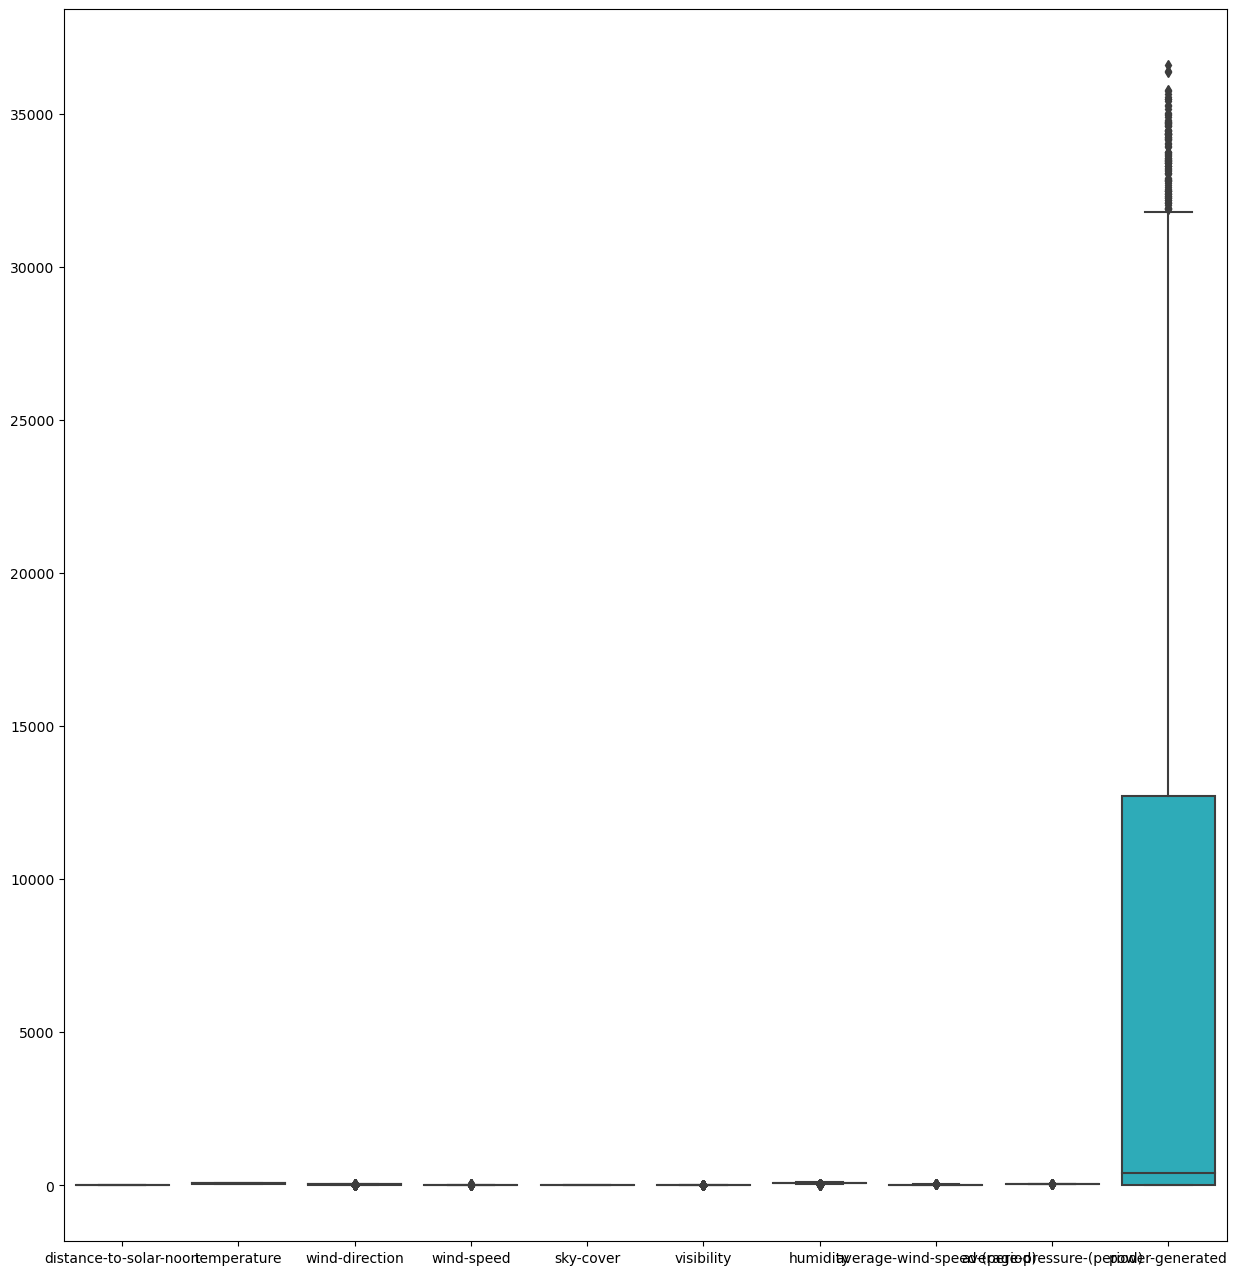

In [18]:
plt.figure(figsize=(15,16))
sns.boxplot(data=df1)
plt.show()

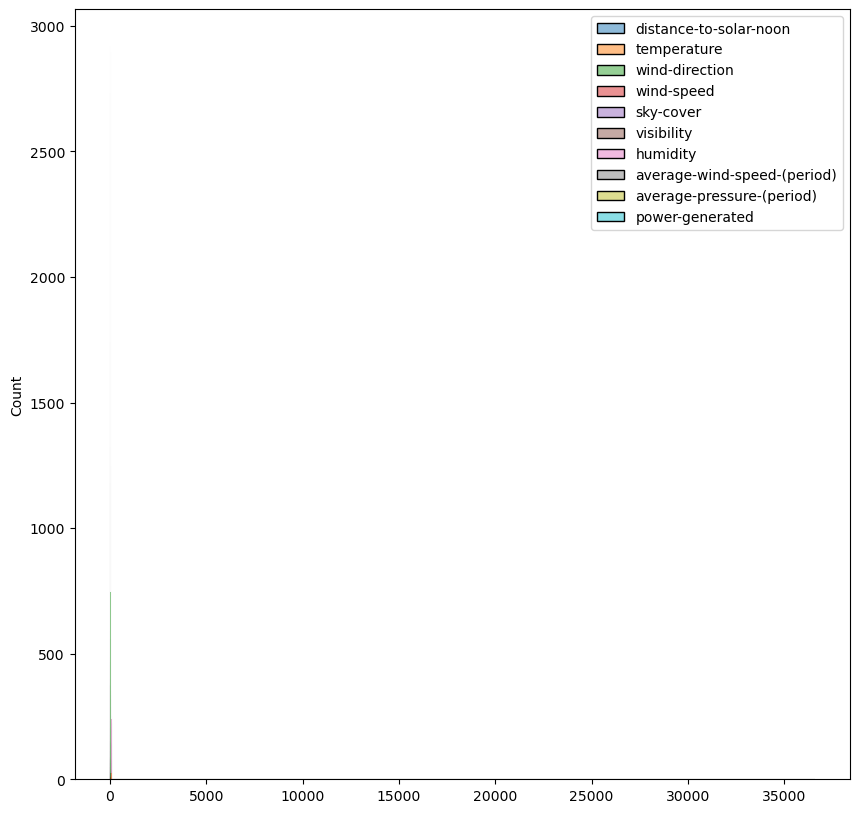

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(data=df1)
plt.show()

<Axes: >

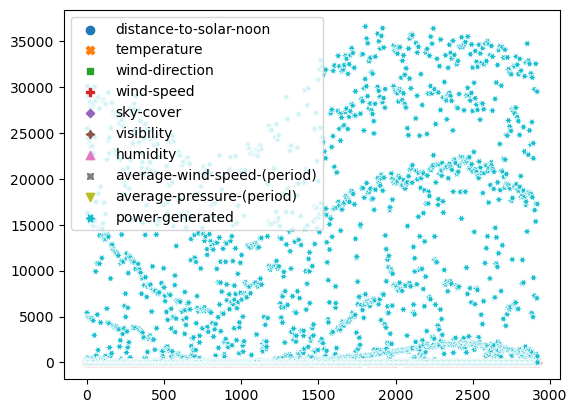

In [20]:
sns.scatterplot(data=df1)

/Users/adithkumar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


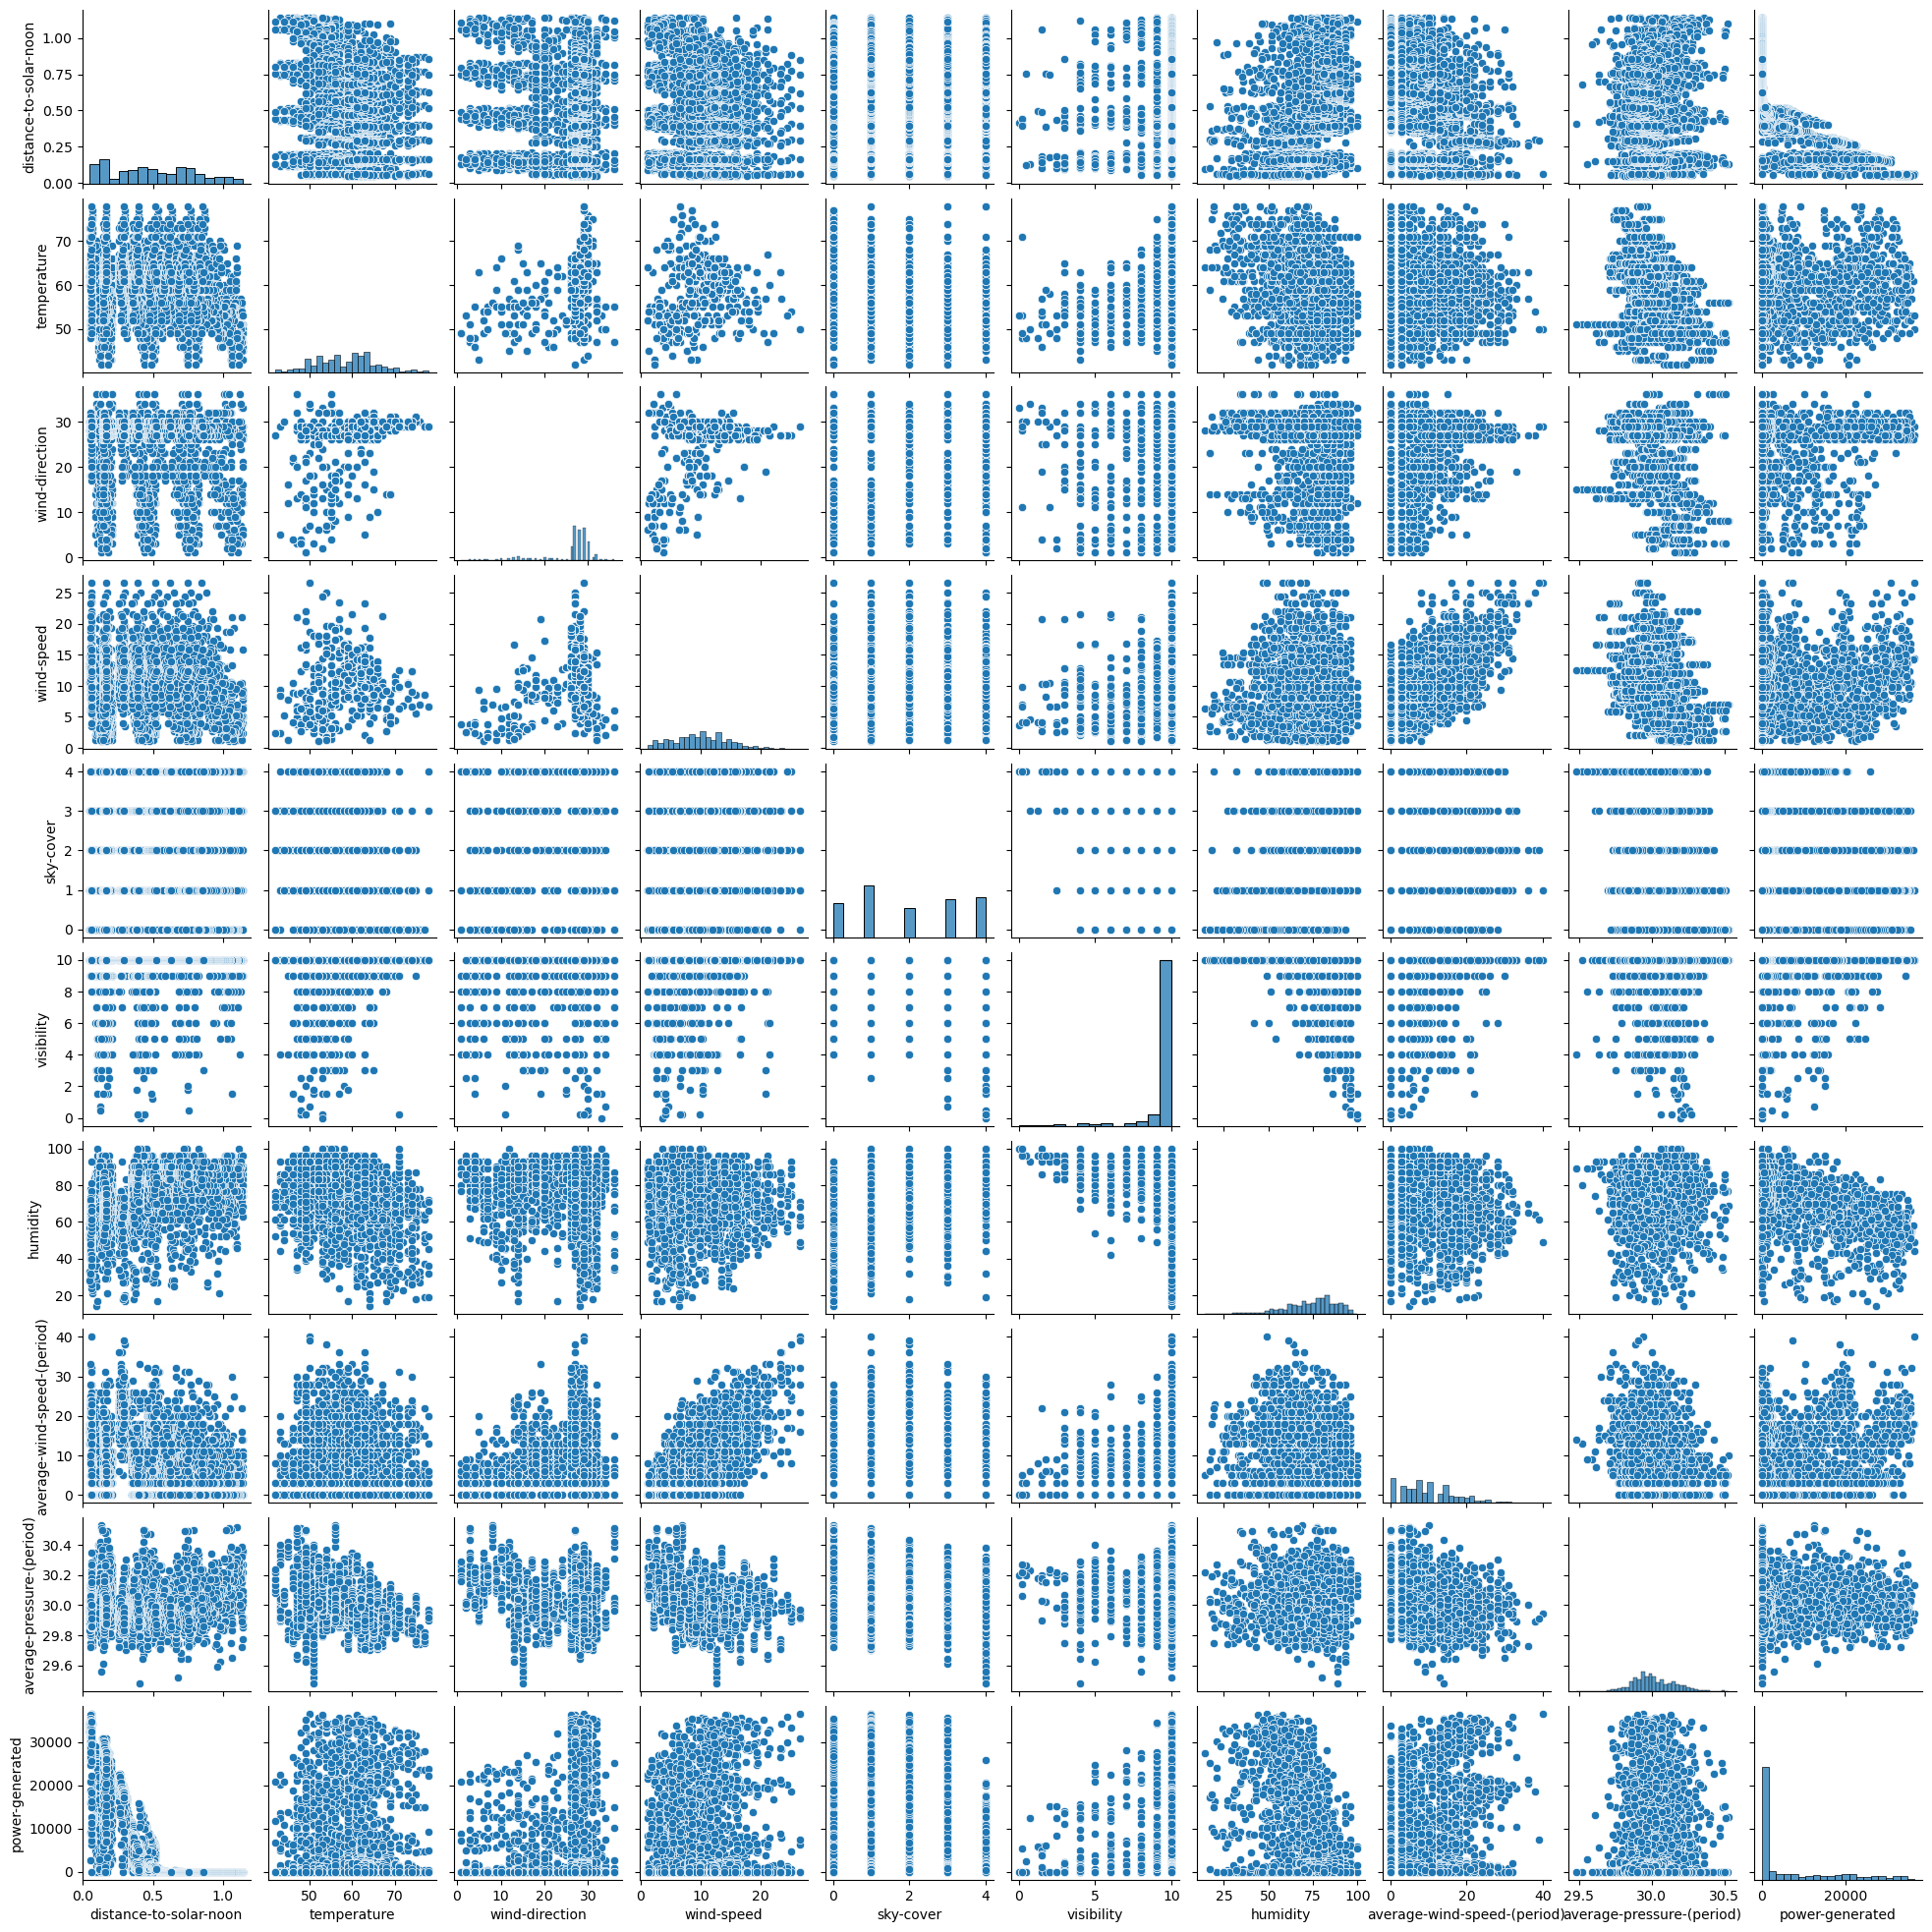

In [21]:

sns.pairplot(data=df1,height=2)


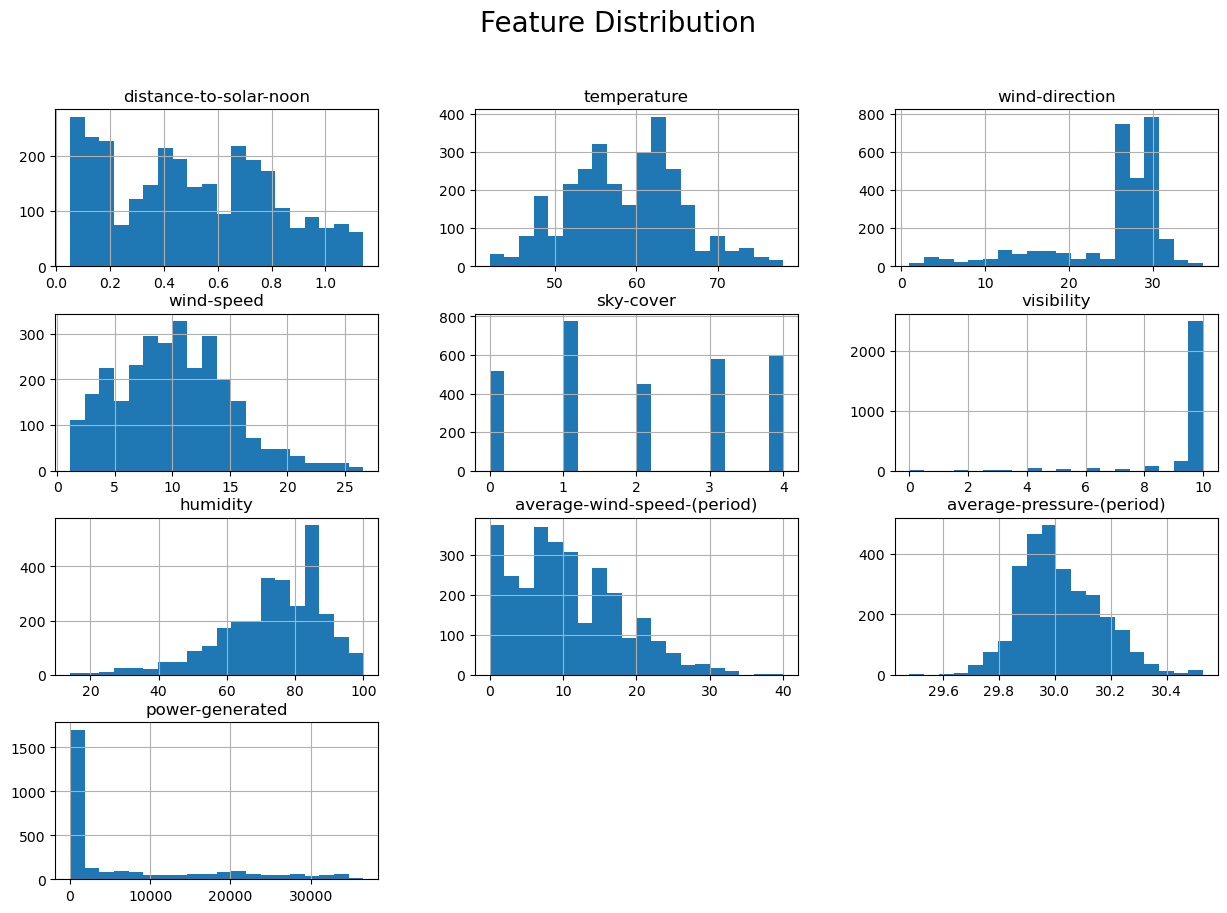

In [22]:
df1.hist(bins=20,figsize=(15,10))
plt.suptitle('Feature Distribution',fontsize=20)
plt.show()

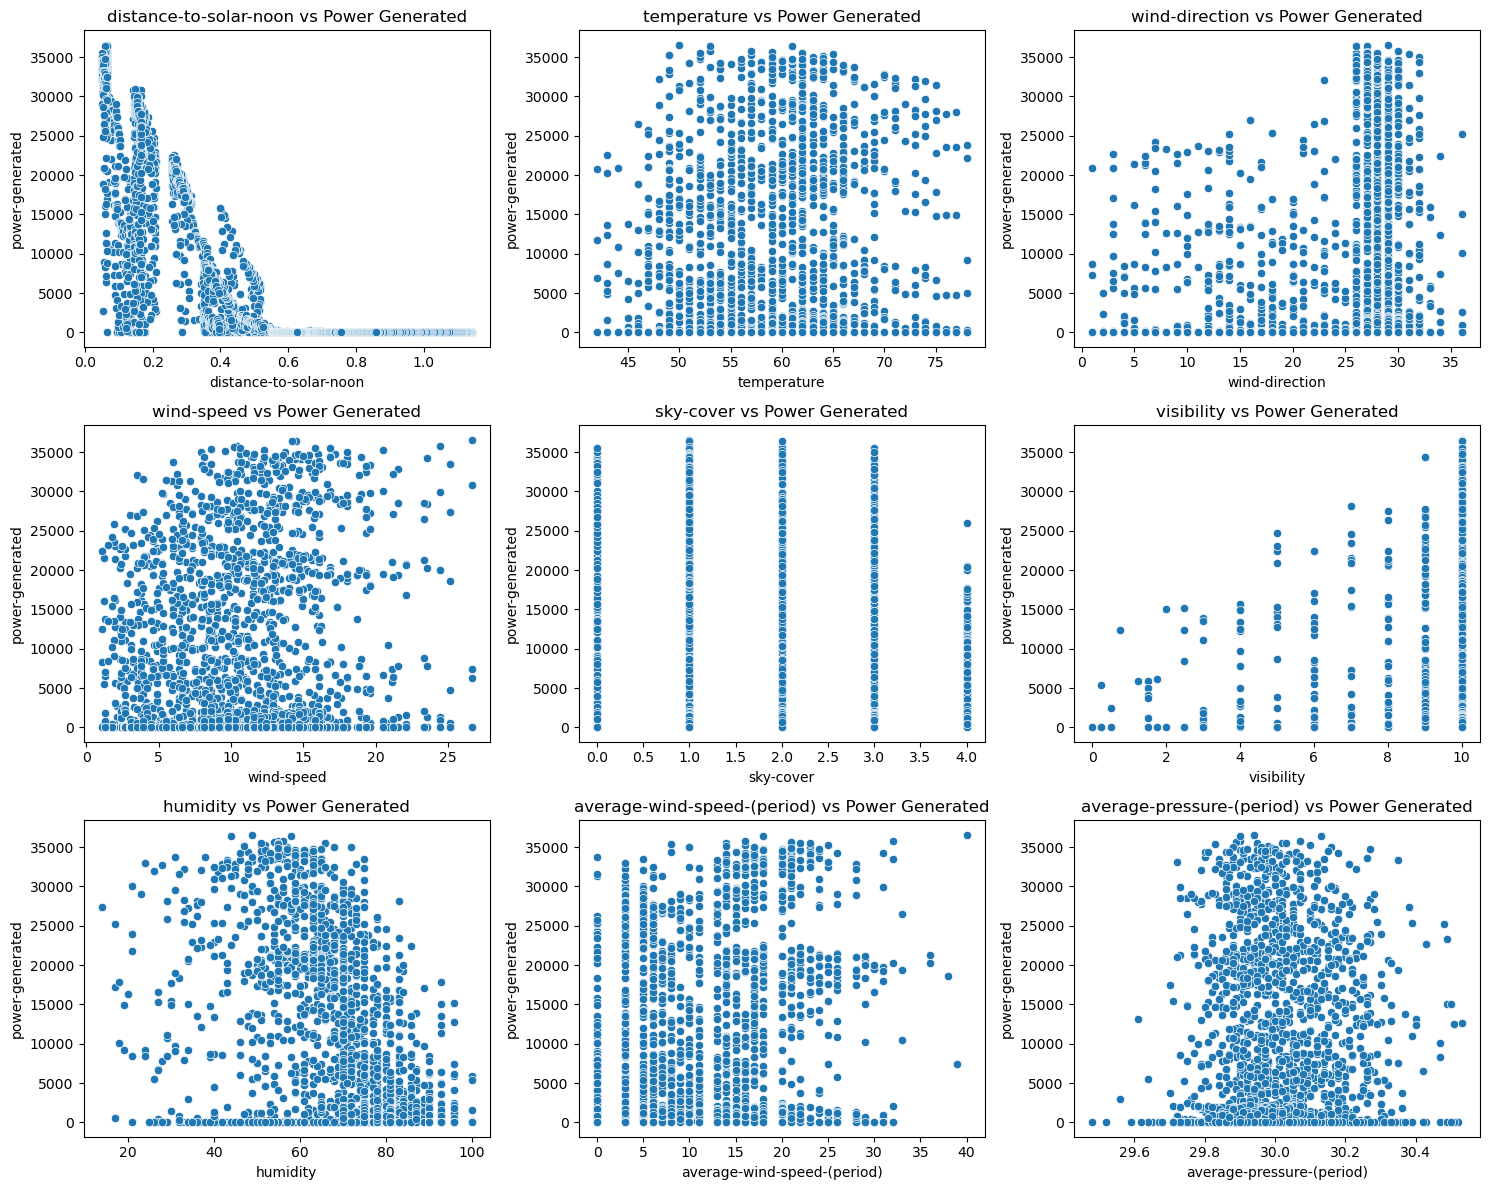

In [23]:
features = df1.columns[:-1]
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, ax in enumerate(axes.flat):
    sns.scatterplot(data=df1, x=features[i], y='power-generated', ax=ax)
    ax.set_title(f'{features[i]} vs Power Generated')

plt.tight_layout()
plt.show()

# Model building

In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

Linear Regression - MSE: 39495176.52401856, R2: 0.6250592396092092


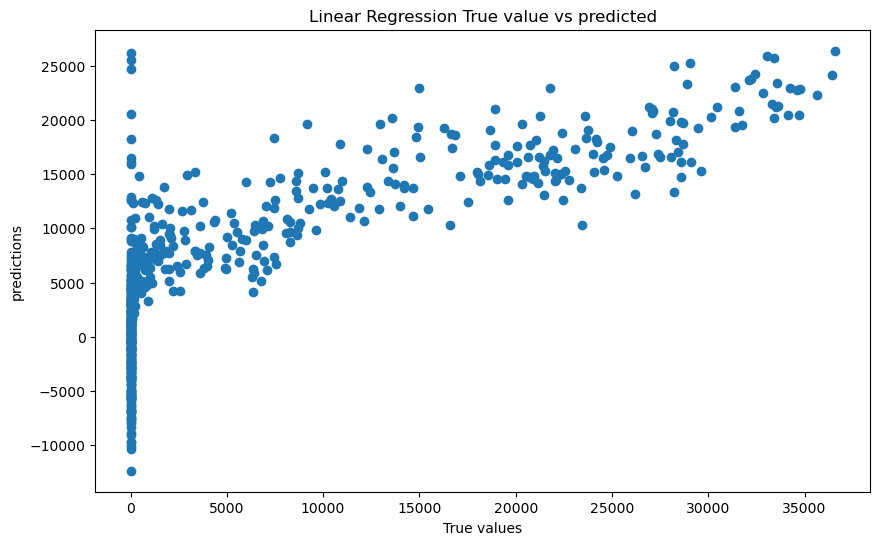

In [33]:

#Linear Regression 

X=df1.drop(columns=['power-generated'],axis=1)
y=df1['power-generated']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

y_pred=linear_reg.predict(X_test)

l_mse=mean_squared_error(y_test,y_pred)

l_r2=r2_score(y_test,y_pred)

print(f'Linear Regression - MSE: {l_mse}, R2: {l_r2}')


plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('predictions')
plt.title('Linear Regression True value vs predicted')
plt.show()

Decision Tree Regressor - MSE: 19712275.1130137, R2: 0.8128648591958793


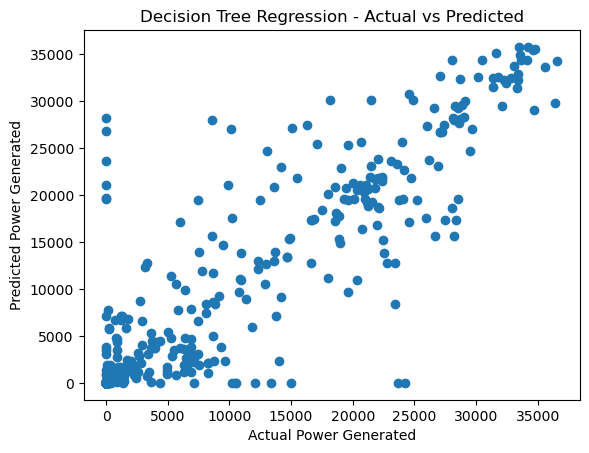

In [26]:
#Decision Tree

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)

print(f'Decision Tree Regressor - MSE: {dt_mse}, R2: {dt_r2}, MAE: {dt_mae}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.title('Decision Tree Regression - Actual vs Predicted')
plt.show()

In [43]:
#Random Forest Regression

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred)


print(f'Random Forest Regressor - MSE: {rf_mse}, R2: {rf_r2}, MAE: {rf_mae}')


Random Forest Regressor - MSE: 11610744.40199469, R2: 0.8897753670719873, MAE: 4981.201479686538


In [40]:
#Gradient Boosting Regressor

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict and evaluate the Gradient Boosting model
y_pred_gb = gb_regressor.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics

print(f'Gradient Boosting Regressor - MSE: {gb_mse}, R2: {gb_r2}, MAE: {gb_mae}')



Gradient Boosting Regressor - MSE: 10431252.738859594, R2: 0.9009726711473731, MAE: 4981.201479686538


Ridge Regression MSE: 39520681.93966477, R2: 0.6248171082712048, MAE: 4981.201479686538


<Figure size 1200x600 with 0 Axes>

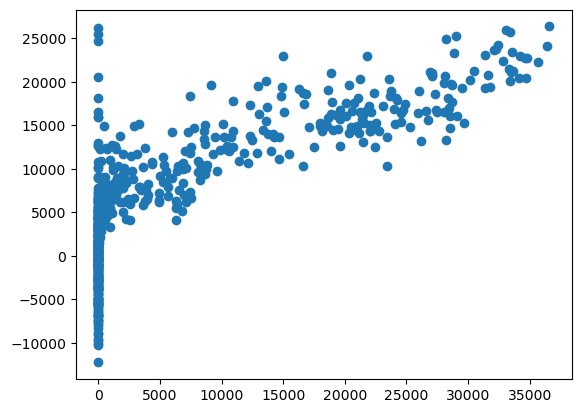

In [41]:
#Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred)

print(f"Ridge Regression MSE: {ridge_mse}, R2: {ridge_r2}, MAE: {ridge_mae}")

plt.figure(figsize=(12, 6))

plt.tight_layout()
plt.show()
plt.scatter(y_test,y_pred_ridge)

Lasso Regression MSE: 39495994.886726245, R2: 0.6250514706216289, MAE: 4981.201479686538


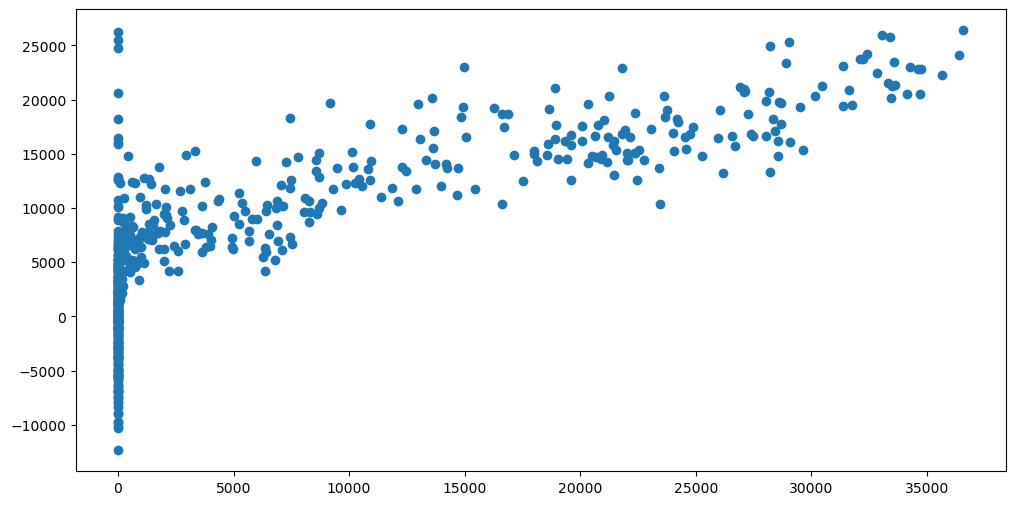

In [42]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mae=mean_absolute_error(y_test, y_pred)
print(f"Lasso Regression MSE: {lasso_mse}, R2: {lasso_r2}, MAE: {lasso_mae}")

plt.figure(figsize=(12, 6))


plt.tight_layout()
plt.scatter(y_test,y_pred_lasso)
plt.show()